In [26]:
import pandas as pd
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns 


In [53]:
treasury = yf.download("^TNX", start = "2013-08-19", end = "2023-08-17" )
gold = pd.read_csv('gold prices.csv')

treasury = treasury.reset_index()

[*********************100%%**********************]  1 of 1 completed


In [46]:
gold.info() #Need to fix NA values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2539 non-null   object 
 1   Close/Last  2539 non-null   float64
 2   Volume      2511 non-null   float64
 3   Open        2539 non-null   float64
 4   High        2539 non-null   float64
 5   Low         2539 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.1+ KB


In [29]:
gold_null = gold.isnull().sum()
print(gold_null)

Date           0
Close/Last     0
Volume        28
Open           0
High           0
Low            0
dtype: int64


28 observations have no value for "volume"
We need to fix this. We can use the average volume for the given year of missing observation to replace these values. 

In [54]:
gold['Date'] = pd.to_datetime(gold['Date'])
gold['Year'] = gold['Date'].dt.year
treasury['Date'] = pd.to_datetime(treasury['Date'])
treasury['Year'] = treasury['Date'].dt.year

,Date,Close/Last,Volume,Open,High,Low,Year
0,2023-08-17,1915.2,146770.0,1922.4,1933.5,1914.2,2023
1,2023-08-16,1928.3,124766.0,1933.1,1938.2,1922.0,2023
2,2023-08-15,1935.2,161512.0,1939.4,1944.3,1927.5,2023
3,2023-08-14,1944.0,117514.0,1945.6,1948.2,1934.2,2023
4,2023-08-11,1946.6,119090.0,1944.9,1953.6,1942.7,2023
...,...,...,...,...,...,...,...
2534,2013-08-23,1395.8,149116.0,1376.1,1399.9,1367.8,2013
2535,2013-08-22,1370.8,134493.0,1365.6,1381.4,1354.5,2013
2536,2013-08-21,1370.1,137350.0,1371.0,1378.9,1359.2,2013
2537,2013-08-20,1372.6,130096.0,1364.9,1378.0,1351.6,2013


In [31]:
gold_volume_mean = gold.groupby('Year')['Volume'].mean()
gold_volume_mean

Year
2013    127009.096774
2014    122787.384921
2015    128677.384921
2016    178144.186508
2017    234966.892430
2018    241842.536000
2019    224530.722222
2020    213228.476190
2021    179240.408730
2022    161591.056452
2023    167933.318471
Name: Volume, dtype: float64

In [32]:
for year, mean_value in gold_volume_mean.items():
    gold.loc[(gold['Year'] == year) & (gold['Volume'].isna()), 'Volume'] = mean_value

gold.isna().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
Year          0
dtype: int64

We have now fixed our missing values. Now, it makes sense for us to add the average price of a given day. We will also add in daily percent returns as well to measure percent change from day-to-day. 


In [33]:
gold.describe() #Summary stats for data

,Date,Close/Last,Volume,Open,High,Low,Year
count,2539,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000
mean,2018-08-05 18:02:07.609295104,1467.437456,183295.607339,1467.455967,1477.035880,1457.630721,2018.092950
min,2013-08-19 00:00:00,1049.600000,1.000000,1051.500000,1062.700000,1045.400000,2013.000000
25%,2016-01-26 12:00:00,1243.900000,123009.500000,1243.850000,1251.250000,1235.800000,2016.000000
50%,2018-08-02 00:00:00,1321.400000,171466.000000,1321.700000,1329.300000,1314.000000,2018.000000
75%,2021-02-08 12:00:00,1774.050000,232827.500000,1773.950000,1785.000000,1763.550000,2021.000000
max,2023-08-17 00:00:00,2069.400000,787217.000000,2076.400000,2085.400000,2049.000000,2023.000000
std,NaN,282.891621,97652.653855,283.126968,285.232942,280.366732,2.921353


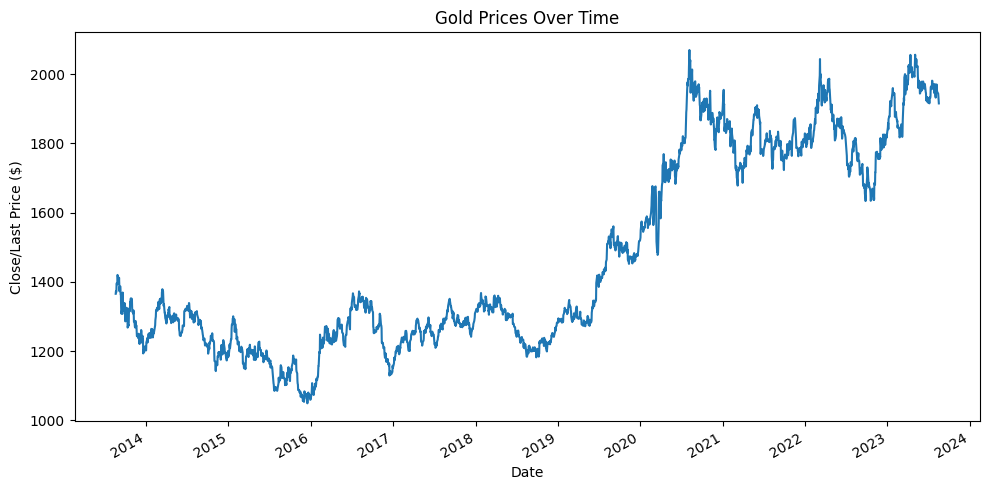

In [34]:
#Start plotting
plt.figure(figsize=(10, 5))

#Create line plot
plt.plot(gold['Date'], gold['Close/Last'])  

#Adding the title and labels
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close/Last Price ($)')

plt.gcf().autofmt_xdate()
plt.grid(False)
plt.tight_layout()

plt.show()

In [59]:
gold['Daily Return'] = gold['Close/Last'].pct_change().fillna(0)
treasury['Daily Return'] = treasury['Close'].pct_change().fillna(0)

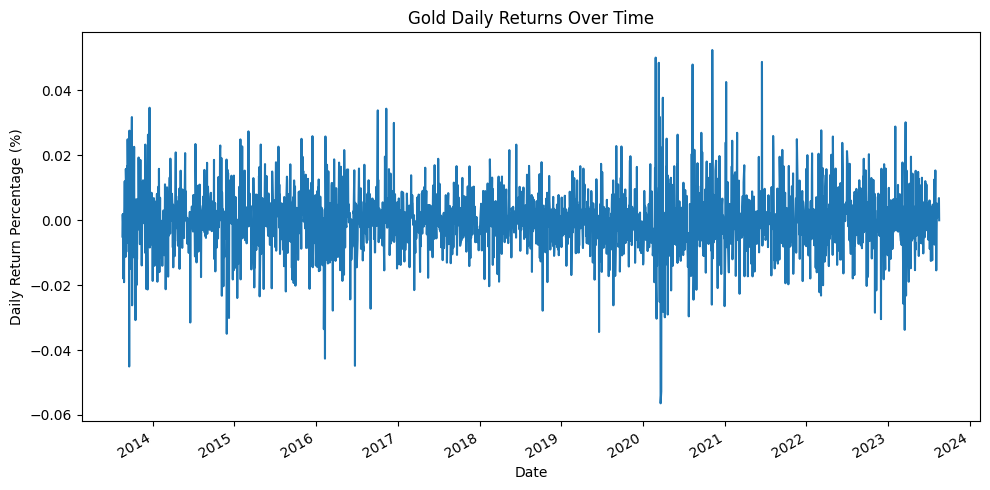

In [37]:
#Start plotting
plt.figure(figsize=(10, 5))

#Create line plot
plt.plot(gold['Date'], gold['Daily Return'])  

#Adding the title and labels
plt.title('Gold Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage (%)')

plt.gcf().autofmt_xdate()
plt.grid(False)
plt.tight_layout()

plt.show()

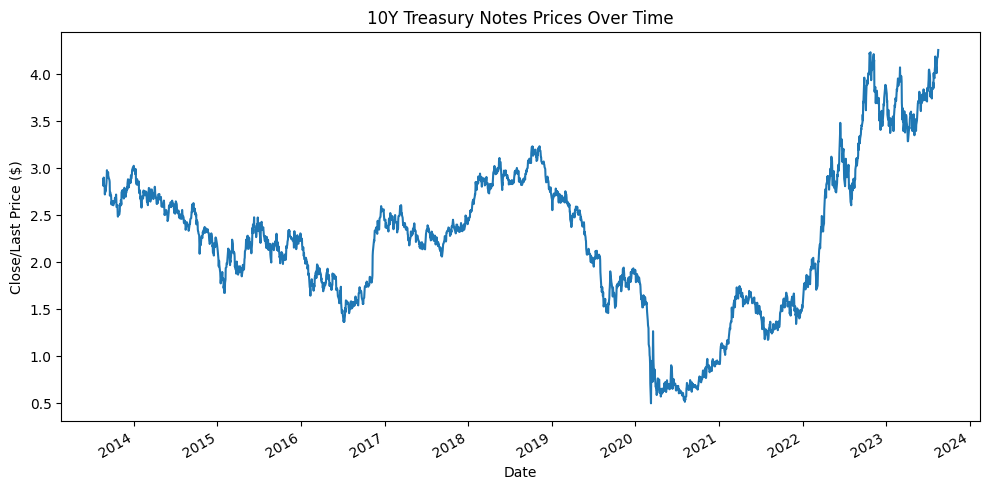

In [57]:
#Start plotting
plt.figure(figsize=(10, 5))

#Create line plot
plt.plot(treasury['Date'], treasury['Close'])  

#Adding the title and labels
plt.title('10Y Treasury Notes Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close/Last Price ($)')

plt.gcf().autofmt_xdate()
plt.grid(False)
plt.tight_layout()

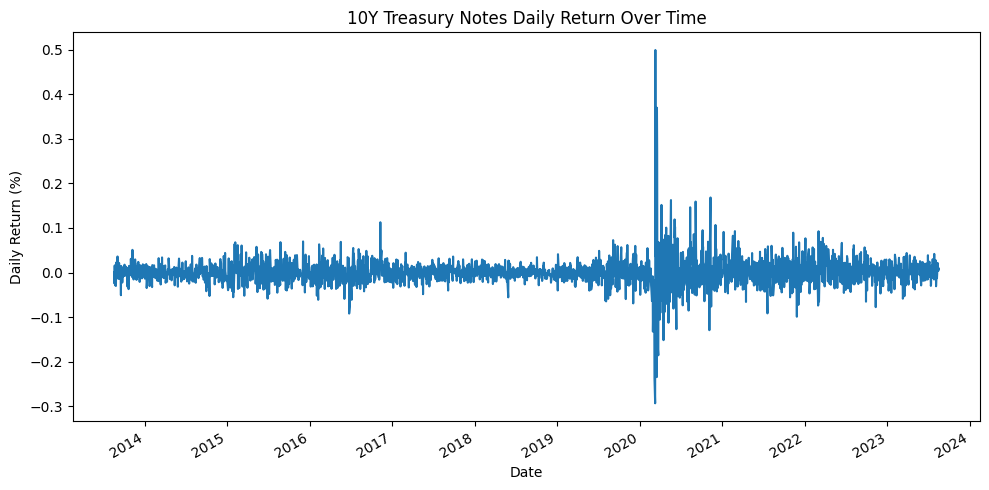

In [60]:
#Start plotting
plt.figure(figsize=(10, 5))

#Create line plot
plt.plot(treasury['Date'], treasury['Daily Return'])  

#Adding the title and labels
plt.title('10Y Treasury Notes Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.gcf().autofmt_xdate()
plt.grid(False)
plt.tight_layout()